In [1015]:
import pandas as pd
import os
import seaborn as sns

#Read .csv files from folder 
df = pd.read_csv('/Users/rodneysmith/Documents/SchoolProjects/DataMining/ad_click_dataset.csv')

In [1016]:
df.shape

(10000, 9)

In [1017]:
df['click'].value_counts(normalize=True)

click
1    0.65
0    0.35
Name: proportion, dtype: float64

In [1018]:
df.dtypes

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object

In [1019]:
#Data PreProcessing
df.isna().sum() 

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [1020]:
df.duplicated().sum()

np.int64(2853)

In [1021]:
#Fill in Null numerical columns
df['age'].fillna(df['age'].median(), inplace=True)

#Fill in Null categorical columns
for col in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_1633/845260951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_1633/845260951.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [1022]:
df_encoded = pd.get_dummies(df.drop(['id', 'full_name'], axis=1), drop_first=True)

In [1023]:
df_encoded.info(), df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             10000 non-null  float64
 1   click                           10000 non-null  int64  
 2   gender_Male                     10000 non-null  bool   
 3   gender_Non-Binary               10000 non-null  bool   
 4   device_type_Mobile              10000 non-null  bool   
 5   device_type_Tablet              10000 non-null  bool   
 6   ad_position_Side                10000 non-null  bool   
 7   ad_position_Top                 10000 non-null  bool   
 8   browsing_history_Entertainment  10000 non-null  bool   
 9   browsing_history_News           10000 non-null  bool   
 10  browsing_history_Shopping       10000 non-null  bool   
 11  browsing_history_Social Media   10000 non-null  bool   
 12  time_of_day_Evening             1

(None,
     age  click  gender_Male  gender_Non-Binary  device_type_Mobile  \
 0  22.0      1        False              False               False   
 1  39.5      1         True              False               False   
 2  41.0      1        False               True               False   
 3  34.0      1         True              False               False   
 4  39.0      0        False               True               False   
 
    device_type_Tablet  ad_position_Side  ad_position_Top  \
 0               False             False             True   
 1               False             False             True   
 2               False              True            False   
 3               False             False            False   
 4               False             False            False   
 
    browsing_history_Entertainment  browsing_history_News  \
 0                           False                  False   
 1                            True                  False   
 2            

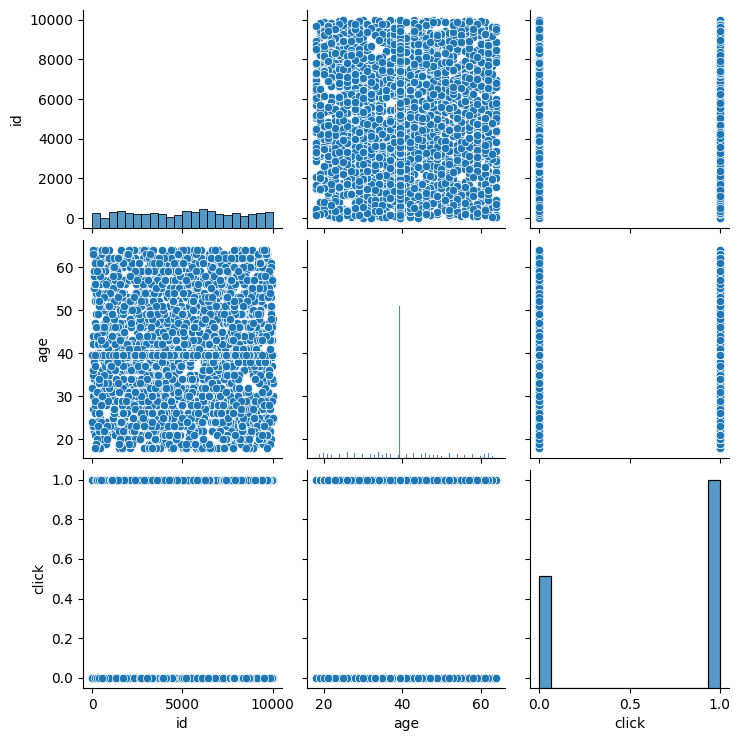

In [1024]:
sns.pairplot(df)

In [1029]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X = df_encoded.drop('click', axis=1)
y = df_encoded['click']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth=15, n_estimators=100)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

#Evaluate model
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")

#Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.838625
Testing Accuracy: 0.7435
Confusion Matrix:
[[ 273  411]
 [ 102 1214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.40      0.52       684
           1       0.75      0.92      0.83      1316

    accuracy                           0.74      2000
   macro avg       0.74      0.66      0.67      2000
weighted avg       0.74      0.74      0.72      2000



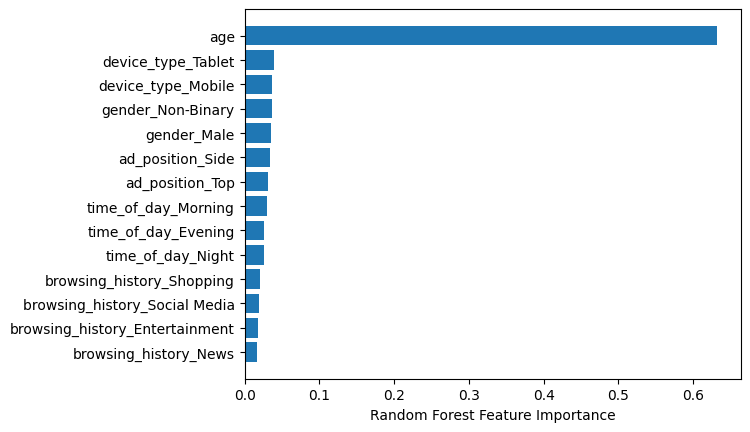

In [1026]:
import matplotlib.pyplot as plt
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [1030]:
clf = RandomForestClassifier() #instantiate decision tree class
clf = clf.fit(X_train, y_train)

In [1031]:
from sklearn.model_selection import cross_validate
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [1032]:
score = cvs['test_score'].mean()
score

np.float64(0.7450000000000001)

In [1033]:
import numpy as np
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
    
    
#average column-wise 
fi_avg = np.mean(fi, axis = 0)

/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_1633/2851363132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_1633/2851363132.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


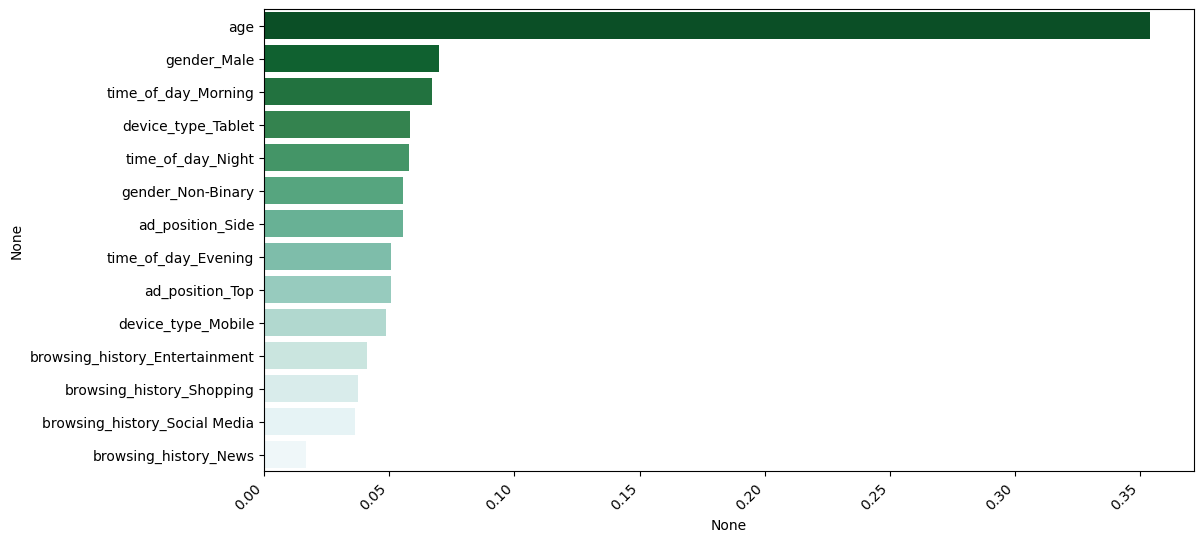

In [1034]:
#convert to pandas series with feature names as index
fi_avg = pd.Series(fi_avg, index = X.columns).sort_values(ascending=False) 

#create plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()